<a href="https://colab.research.google.com/github/aiswaryapaul/COVID19-TIMESERIES/blob/main/Covid19Proj25June.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dataset Link: https://drive.google.com/file/d/1TJdxCYLWOIDB4UPzXiLIOAfe1Sibmi6r/view?usp=sharing

**Import the necessary libraries**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Configurational Library**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

**Loading data**

In [ ]:
df = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
df.head()

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.shape

(49068, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49068 entries, 0 to 49067
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Province/State  14664 non-null  object 
 1   Country/Region  49068 non-null  object 
 2   Lat             49068 non-null  float64
 3   Long            49068 non-null  float64
 4   Date            49068 non-null  object 
 5   Confirmed       49068 non-null  int64  
 6   Deaths          49068 non-null  int64  
 7   Recovered       49068 non-null  int64  
 8   Active          49068 non-null  int64  
 9   WHO Region      49068 non-null  object 
dtypes: float64(2), int64(4), object(4)
memory usage: 3.7+ MB


In [ ]:
df.rename(columns={'Province/State': 'State','Country/Region': 'Country'}, inplace =True)

In [ ]:
df.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
0,NaN,Afghanistan,33.93911,67.709953,2020-01-22,0,0,0,0,Eastern Mediterranean
1,NaN,Albania,41.15330,20.168300,2020-01-22,0,0,0,0,Europe
2,NaN,Algeria,28.03390,1.659600,2020-01-22,0,0,0,0,Africa
3,NaN,Andorra,42.50630,1.521800,2020-01-22,0,0,0,0,Europe
4,NaN,Angola,-11.20270,17.873900,2020-01-22,0,0,0,0,Africa


In [ ]:
df.Date.value_counts()

,count
Date,
2020-01-22,261
2020-01-23,261
2020-01-24,261
2020-01-25,261
2020-01-26,261
...,...
2020-07-23,261
2020-07-24,261
2020-07-25,261


We can see tht max date will be **2020-07-27**

In [ ]:
df.Date.max()

'2020-07-27'

**Populationg rows with max date in top**

In [ ]:
top = df[df['Date'] == '2020-07-27']
top.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
48807,NaN,Afghanistan,33.93911,67.709953,2020-07-27,36263,1269,25198,9796,Eastern Mediterranean
48808,NaN,Albania,41.15330,20.168300,2020-07-27,4880,144,2745,1991,Europe
48809,NaN,Algeria,28.03390,1.659600,2020-07-27,27973,1163,18837,7973,Africa
48810,NaN,Andorra,42.50630,1.521800,2020-07-27,907,52,803,52,Europe
48811,NaN,Angola,-11.20270,17.873900,2020-07-27,950,41,242,667,Africa


**Grouping all rows based on country**

In [ ]:
top.groupby(by='Country')[['Confirmed',	'Deaths',	'Recovered',	'Active']].sum().reset_index()

,Country,Confirmed,Deaths,Recovered,Active
0,Afghanistan,36263,1269,25198,9796
1,Albania,4880,144,2745,1991
2,Algeria,27973,1163,18837,7973
3,Andorra,907,52,803,52
4,Angola,950,41,242,667
...,...,...,...,...,...
182,West Bank and Gaza,10621,78,3752,6791
183,Western Sahara,10,1,8,1
184,Yemen,1691,483,833,375
185,Zambia,4552,140,2815,1597


In [ ]:
# Confirmed Cases
Confirmed = df.groupby(by='Date')['Confirmed'].sum().reset_index()

In [ ]:
Confirmed.head()

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
Confirmed.tail()

,Date,Confirmed
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796
187,2020-07-27,16480485


**Find the same for Death, Active, Recoverd cases**

In [ ]:
Confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


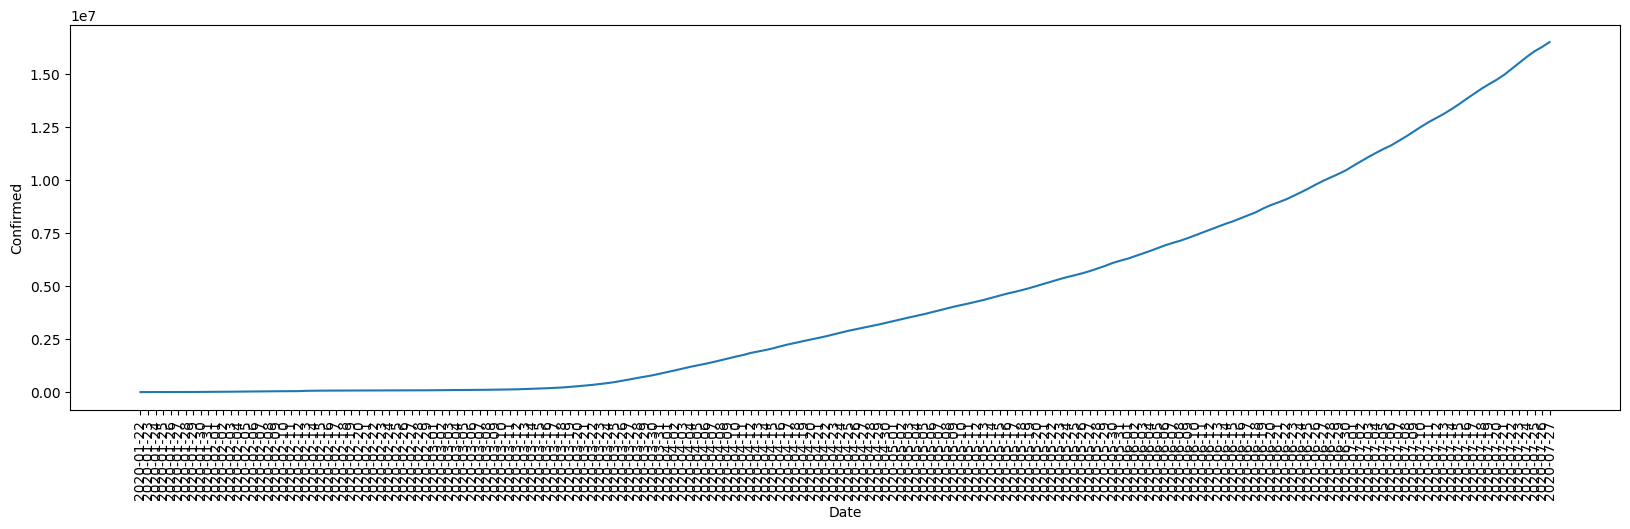

In [ ]:
plt.figure(figsize = (20,5))
sns.lineplot(data = Confirmed, x='Date',y='Confirmed')
plt.xticks(rotation=90)
plt.show()

**Top 10 Countries with the most Recovered Case**

In [ ]:
# Confirmed Cases
top_10_Recovered = df.groupby(by='Country')['Recovered'].sum().sort_values(ascending=False).head(10)

In [ ]:
top_10_Recovered

,Recovered
Country,
US,56353416
Brazil,54492873
Russia,25120448
India,23783720
Germany,17107839
Italy,15673910
Iran,15200895
Spain,15093583
Turkey,13345389


**Find for Death, Confirmed cases too (With Graph)**

In [ ]:
# Confirmed Cases
top_10_Active = df.groupby(by='Country')['Active'].sum().sort_values(ascending=False).head(10).reset_index()

In [ ]:
top_10_Active

,Country,Active
0,US,156981121
1,Brazil,31094060
2,United Kingdom,22624595
3,Russia,19668578
4,India,15987913
5,France,10980287
6,Spain,9277432
7,Canada,8656985
8,Peru,7748957
9,Italy,7363518


**Let's Create the dataset specific for US**

In [ ]:
US = df[df['Country']=='US']
US.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
223,NaN,US,40.0,-100.0,2020-01-22,1,0,0,1,Americas
484,NaN,US,40.0,-100.0,2020-01-23,1,0,0,1,Americas
745,NaN,US,40.0,-100.0,2020-01-24,2,0,0,2,Americas
1006,NaN,US,40.0,-100.0,2020-01-25,2,0,0,2,Americas
1267,NaN,US,40.0,-100.0,2020-01-26,5,0,0,5,Americas


In [ ]:
India = df[df['Country']=='India']
India.head()

,State,Country,Lat,Long,Date,Confirmed,Deaths,Recovered,Active,WHO Region
129,NaN,India,20.593684,78.96288,2020-01-22,0,0,0,0,South-East Asia
390,NaN,India,20.593684,78.96288,2020-01-23,0,0,0,0,South-East Asia
651,NaN,India,20.593684,78.96288,2020-01-24,0,0,0,0,South-East Asia
912,NaN,India,20.593684,78.96288,2020-01-25,0,0,0,0,South-East Asia
1173,NaN,India,20.593684,78.96288,2020-01-26,0,0,0,0,South-East Asia


**HW: Calculate these cases for 3-4 countries then compare the graph of those country to check how the cases were changed**

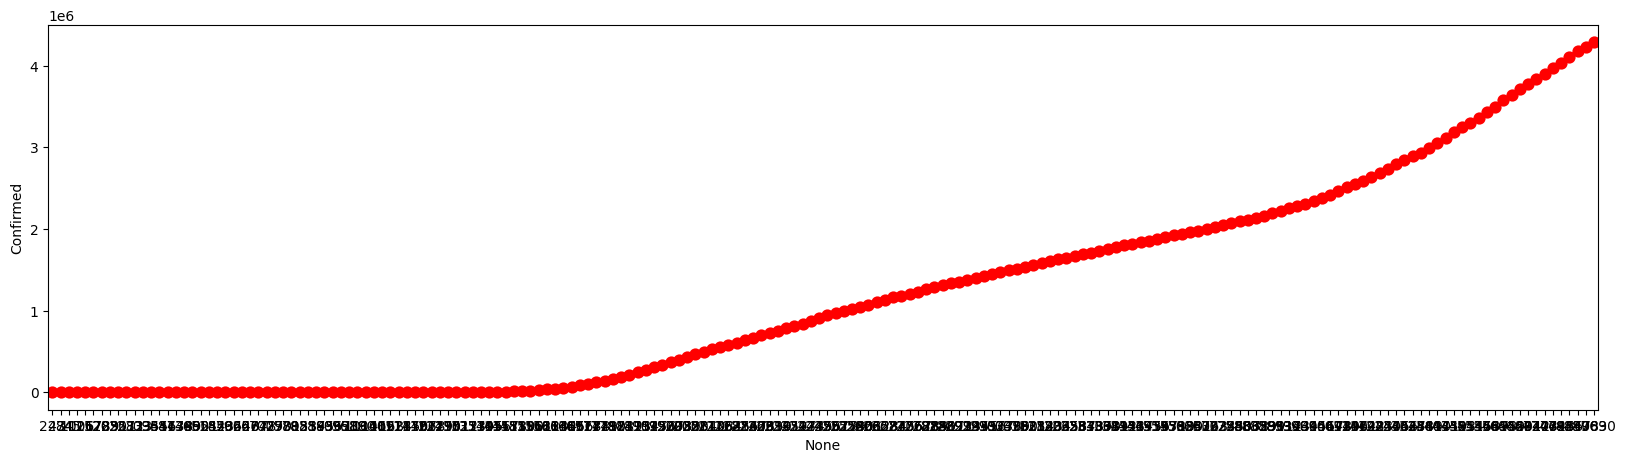

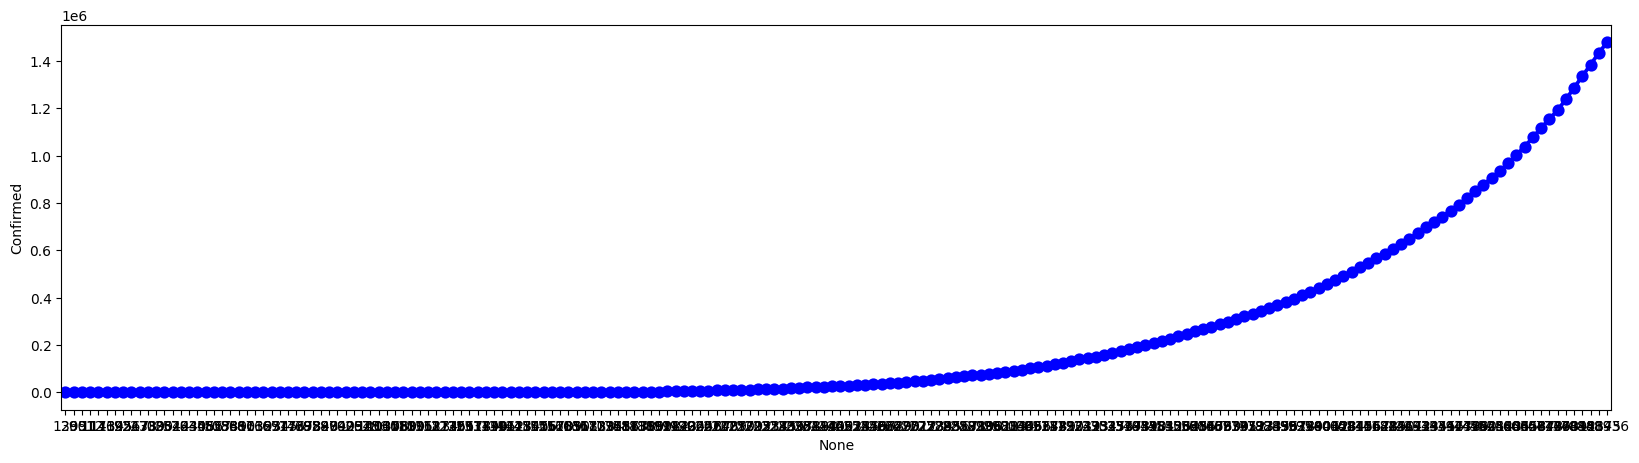

In [ ]:
plt.figure(figsize = (20,5))
sns.pointplot(data = US, x=US.index,y=US.Confirmed, color = 'Red')
plt.show()
plt.figure(figsize = (20,5))
sns.pointplot(data = India, x=India.index,y=India.Confirmed, color = 'Blue')
plt.show()

##**Model Building For Prophet**
**Note: Prophet is a Time series model used for Forecasting**
* It is developed by Facebook, in 2017
* Make sure to rename the date column as 'ds' and Target column as 'y'

In [ ]:
!pip install prophet

In [ ]:
# Read the dataset
df1 = pd.read_csv('/content/covid_19_clean_complete.csv')

In [ ]:
# Now i will create data specifically for Confirmed cases
confirmed = df1.groupby(by='Date').sum()['Confirmed'].reset_index()
confirmed

,Date,Confirmed
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118
...,...,...
183,2020-07-23,15510481
184,2020-07-24,15791645
185,2020-07-25,16047190
186,2020-07-26,16251796


**I will forecast for Confirmed Cases**
* You guys need to do the forecasting for Death, Recover and active

###**Forecasting for Confirmed Cases**

In [ ]:
confirmed.columns = ['ds','y']
confirmed.head()

,ds,y
0,2020-01-22,555
1,2020-01-23,654
2,2020-01-24,941
3,2020-01-25,1434
4,2020-01-26,2118


In [ ]:
from prophet import Prophet
m = Prophet()

In [ ]:
m.fit(confirmed)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkxma08ju/met0wnd7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpkxma08ju/mwx8ldk0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=6612', 'data', 'file=/tmp/tmpkxma08ju/met0wnd7.json', 'init=/tmp/tmpkxma08ju/mwx8ldk0.json', 'output', 'file=/tmp/tmpkxma08ju/prophet_model1sj2qiun/prophet_model-20250625163528.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
16:35:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
16:35:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


**Making Prediction for next 7 month**

In [ ]:
# Keyword alert: method name: make_future_dataframe
future = m.make_future_dataframe(periods = 7)
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2020-01-22,-9.613281e+03,-1.306860e+05,8.881193e+04,-9.613281e+03,-9.613281e+03,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,-11063.561776,0.0,0.0,0.0,-2.067684e+04
1,2020-01-23,-6.933404e+03,-1.110590e+05,9.991883e+04,-6.933404e+03,-6.933404e+03,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,-8.050948e+03
2,2020-01-24,-4.253528e+03,-9.715099e+04,1.088337e+05,-4.253528e+03,-4.253528e+03,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,5.827455e+03
3,2020-01-25,-1.573651e+03,-9.060382e+04,1.166727e+05,-1.573651e+03,-1.573651e+03,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.217668e+04
4,2020-01-26,1.106226e+03,-1.000527e+05,1.236196e+05,1.106226e+03,1.106226e+03,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,8.405020e+03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,2020-07-30,1.674503e+07,1.663666e+07,1.685447e+07,1.673862e+07,1.675393e+07,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,-1117.543336,0.0,0.0,0.0,1.674391e+07
191,2020-07-31,1.694902e+07,1.684688e+07,1.706443e+07,1.693403e+07,1.696555e+07,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,10080.982351,0.0,0.0,0.0,1.695910e+07
192,2020-08-01,1.715301e+07,1.705453e+07,1.727521e+07,1.712719e+07,1.717823e+07,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,13750.330594,0.0,0.0,0.0,1.716676e+07
193,2020-08-02,1.735700e+07,1.724745e+07,1.748021e+07,1.732219e+07,1.739120e+07,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,7298.794381,0.0,0.0,0.0,1.736430e+07


In [ ]:
forecast[['ds','yhat','yhat_upper','yhat_lower']]

,ds,yhat,yhat_upper,yhat_lower
0,2020-01-22,-2.067684e+04,8.881193e+04,-1.306860e+05
1,2020-01-23,-8.050948e+03,9.991883e+04,-1.110590e+05
2,2020-01-24,5.827455e+03,1.088337e+05,-9.715099e+04
3,2020-01-25,1.217668e+04,1.166727e+05,-9.060382e+04
4,2020-01-26,8.405020e+03,1.236196e+05,-1.000527e+05
...,...,...,...,...
190,2020-07-30,1.674391e+07,1.685447e+07,1.663666e+07
191,2020-07-31,1.695910e+07,1.706443e+07,1.684688e+07
192,2020-08-01,1.716676e+07,1.727521e+07,1.705453e+07
193,2020-08-02,1.736430e+07,1.748021e+07,1.724745e+07


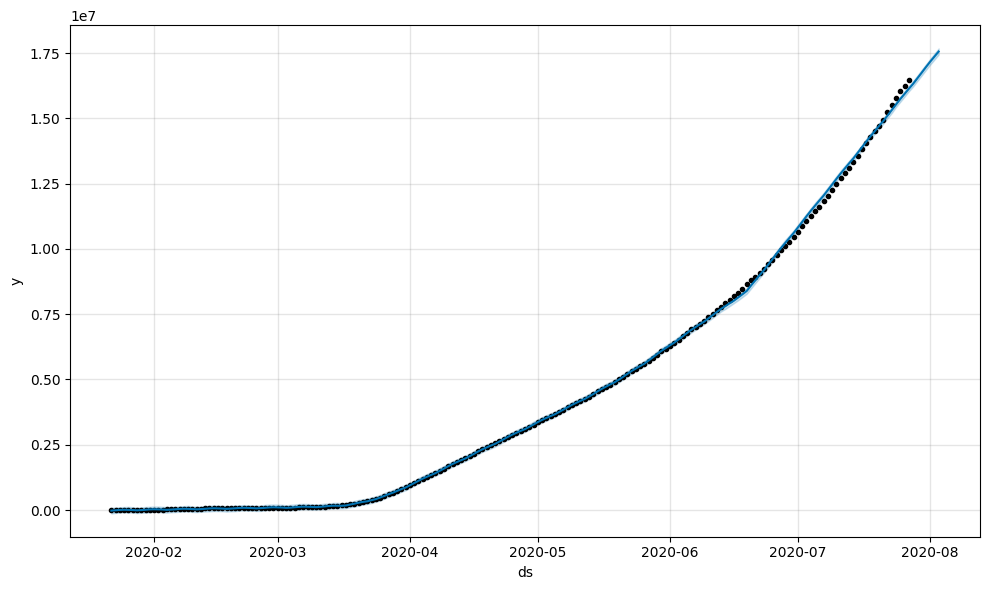

In [ ]:
m.plot(forecast)
plt.show()

**Let's see choropleth graph**

In [ ]:
import plotly
import plotly.express as px

In [ ]:
df1.columns

Index(['Province/State', 'Country/Region', 'Lat', 'Long', 'Date', 'Confirmed',
       'Deaths', 'Recovered', 'Active', 'WHO Region'],
      dtype='object')

In [ ]:
world = df1.groupby(by='Country/Region')[['Confirmed',
       'Deaths', 'Recovered', 'Active']].sum().reset_index()

In [ ]:
world

,Country/Region,Confirmed,Deaths,Recovered,Active
0,Afghanistan,1936390,49098,798240,1089052
1,Albania,196702,5708,118877,72117
2,Algeria,1179755,77972,755897,345886
3,Andorra,94404,5423,69074,19907
4,Angola,22662,1078,6573,15011
...,...,...,...,...,...
182,West Bank and Gaza,233461,1370,61124,170967
183,Western Sahara,901,63,648,190
184,Yemen,67180,17707,23779,25694
185,Zambia,129421,2643,83611,43167


In [ ]:
fig = px.choropleth(world,locations='Country/Region',
                    locationmode='country names',
                    color = 'Deaths',hover_name='Country/Region',
                    range_color=(1,20000),
                    color_continuous_scale='reds',
                    title='Countries with Death Cases')

fig.show()

**Try to Get A specific country data**